In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [3]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [4]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [51]:
mdl['Server Name'].value_counts()

CALBIPRD02    52
CALBIPRD03    52
CALBIPRD01    52
CALBIPRD06    52
CALBIPRD07    52
CALBIPRD04    52
CALBIPRD05    52
CALBIPRD08    52
CALMFRRSQL    52
CALBITST05    52
Name: Server Name, dtype: int64

In [67]:
cpu_df = mdl.pivot(index='Date', columns='Server Name', values='CPU %')
ram_df = mdl.pivot(index='Date', columns='Server Name', values='RAM')
# cpu_df.columns = ['cpu_' + colname for colname in cpu_df.columns]  # add 'cpu_' to the names of all columns
# ram_df.columns = ['ram_' + colname for colname in ram_df.columns]  # add 'ram_' to the names of all columns

In [69]:
cpu_df.columns

Index([u'CALBIPRD01', u'CALBIPRD02', u'CALBIPRD03', u'CALBIPRD04',
       u'CALBIPRD05', u'CALBIPRD06', u'CALBIPRD07', u'CALBIPRD08',
       u'CALBITST05', u'CALMFRRSQL'],
      dtype='object', name=u'Server Name')

In [84]:
tst = cpu_df[['CALBIPRD01']]
tst = tst.reset_index()
tst.columns = ['ds', 'y']
tst.head()
m=Prophet()
m.fit(tst.dropna())

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_season

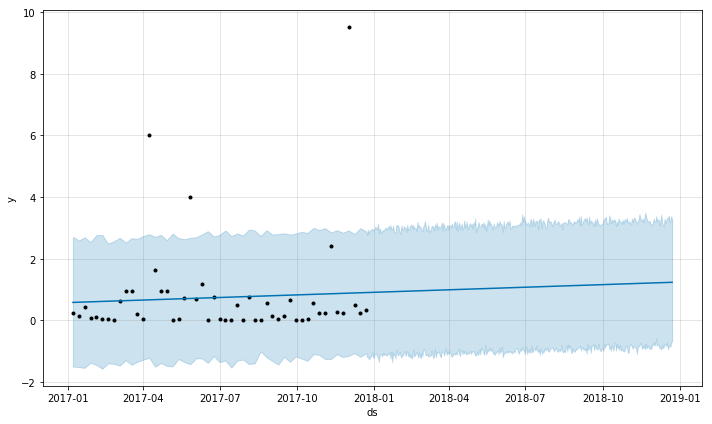

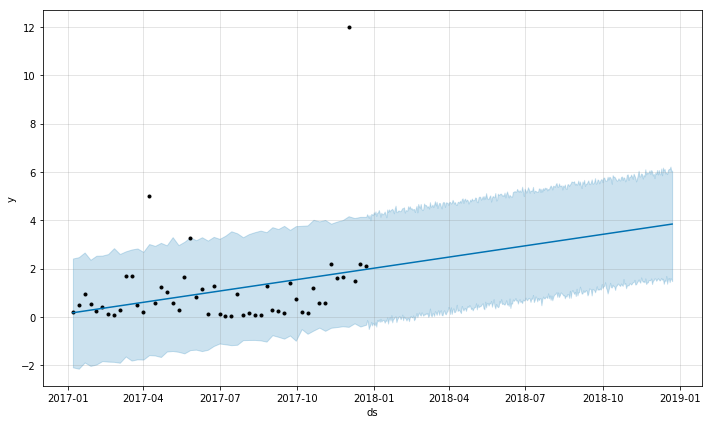

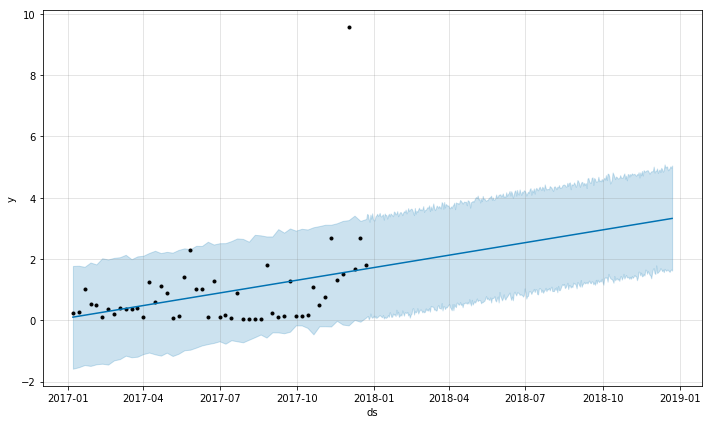

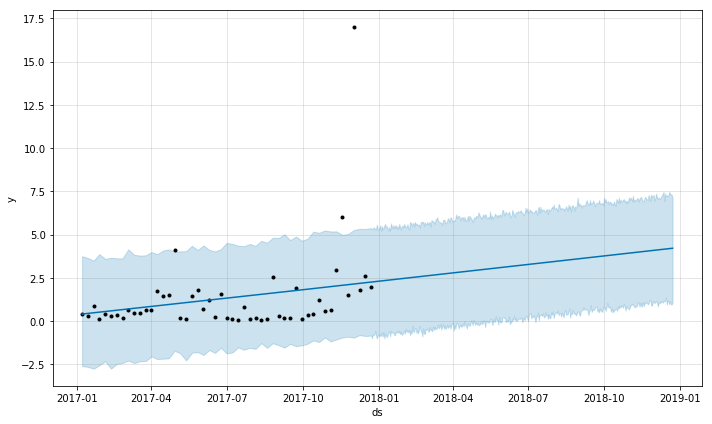

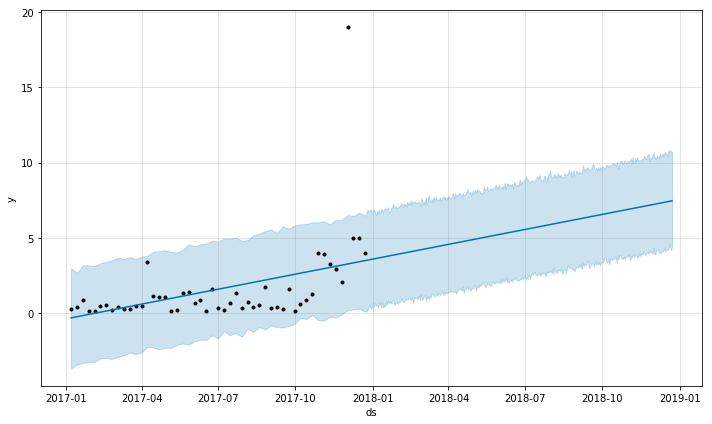

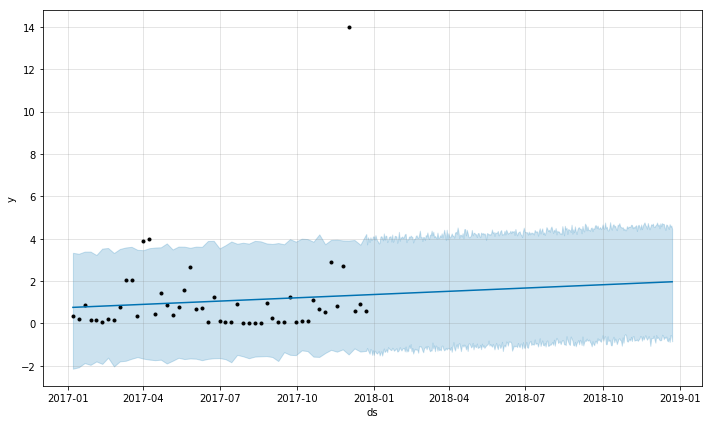

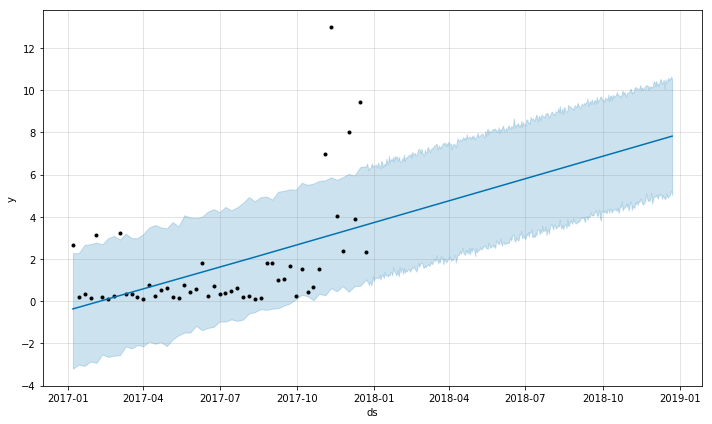

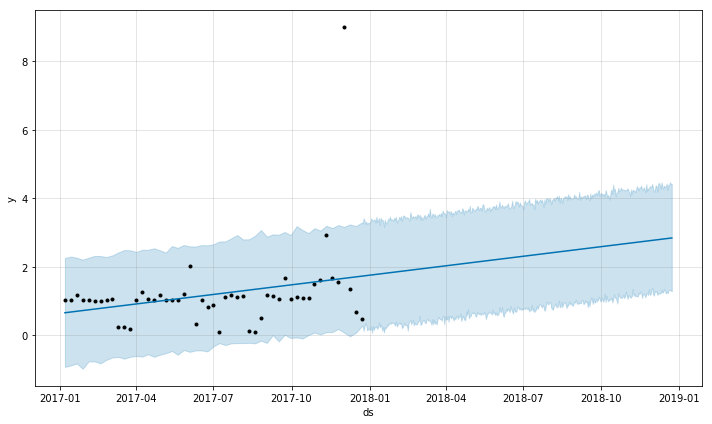

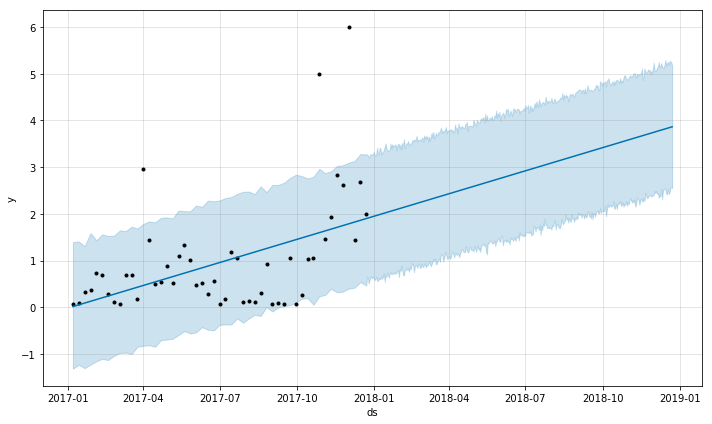

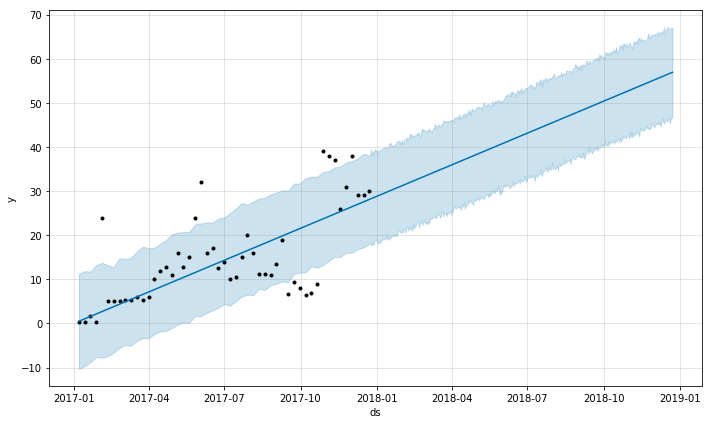

In [86]:
for mycolumn in cpu_df.columns:
    tst = cpu_df[[mycolumn]]
    tst = tst.reset_index()
    tst.columns = ['ds', 'y']
    m=Prophet()
    m.fit(tst.dropna())
    future=m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    m.plot(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_season

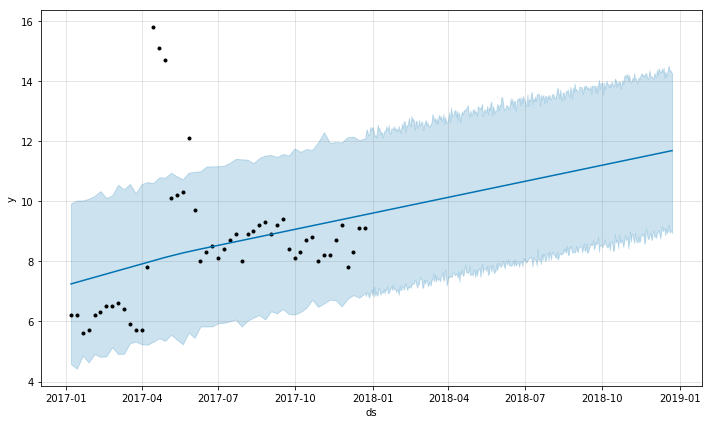

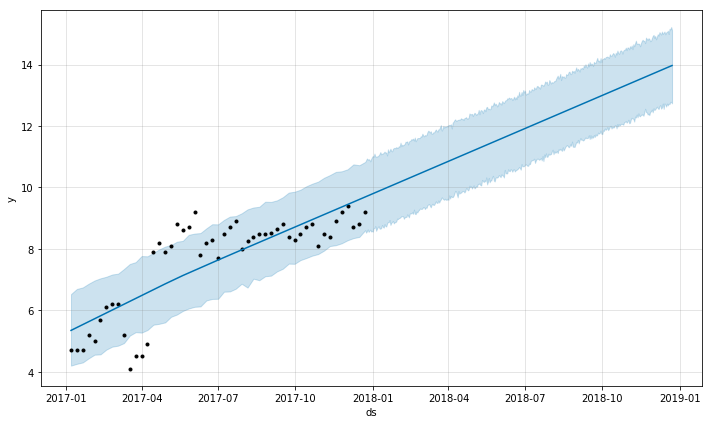

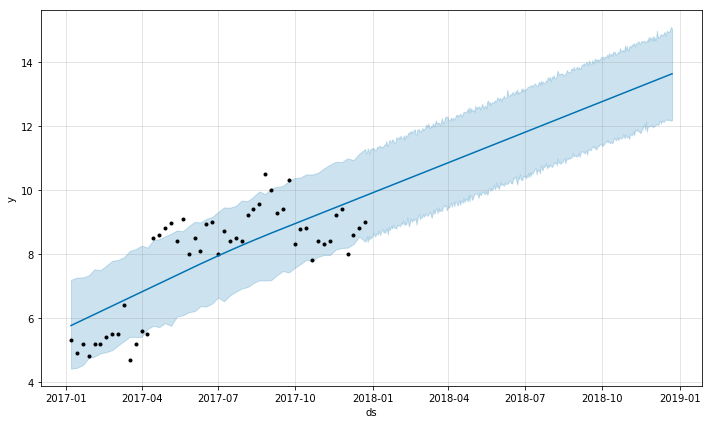

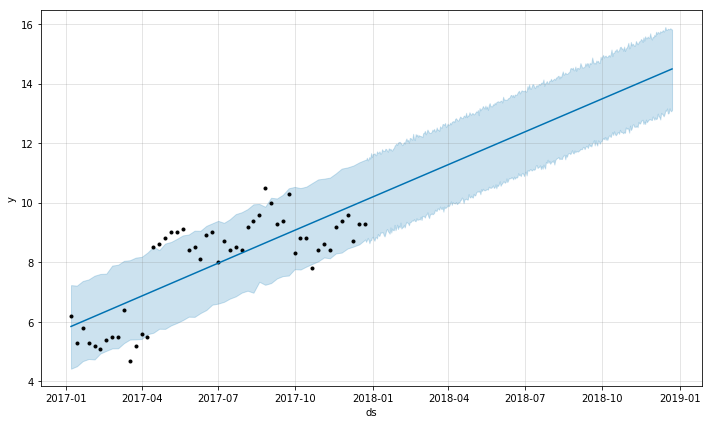

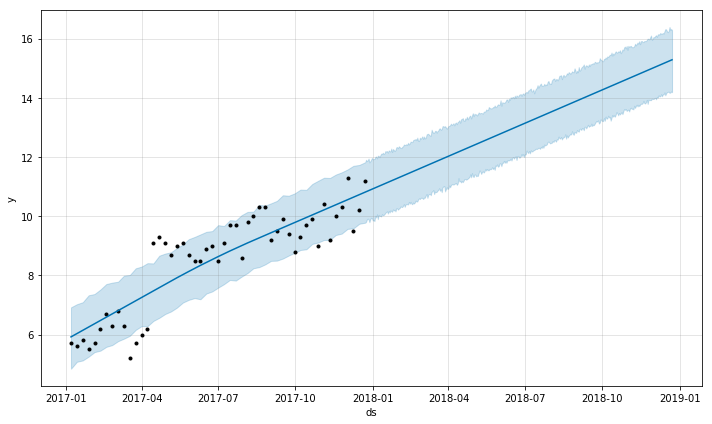

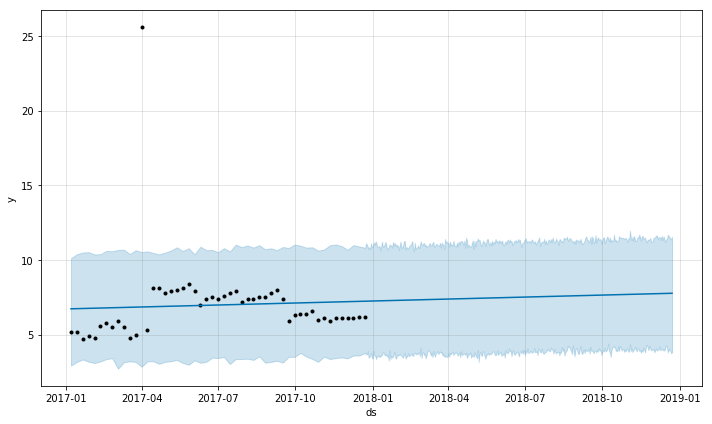

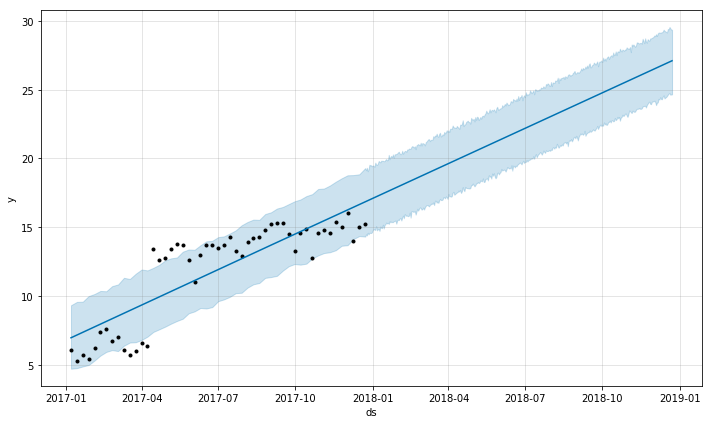

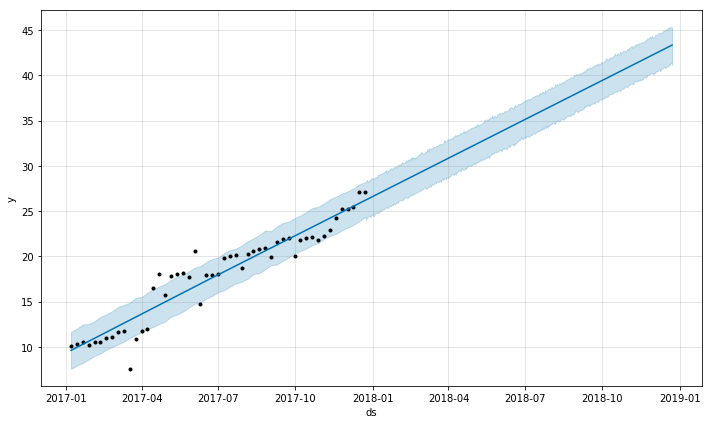

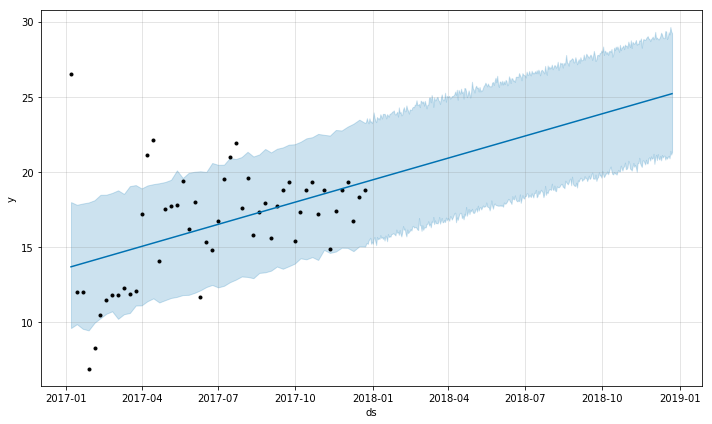

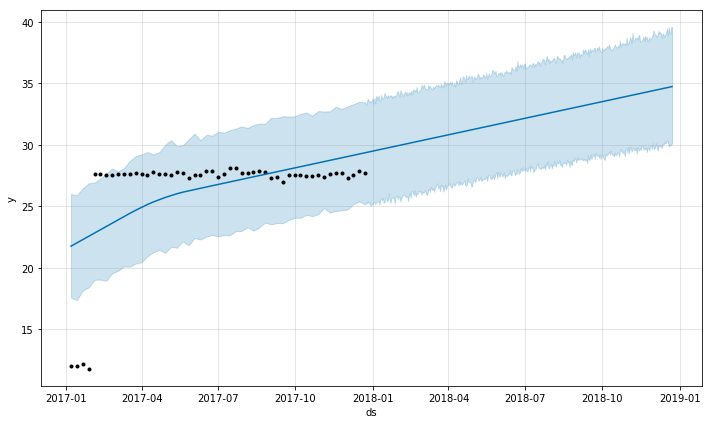

In [87]:
for mycolumn in ram_df.columns:
    tst = ram_df[[mycolumn]]
    tst = tst.reset_index()
    tst.columns = ['ds', 'y']
    m=Prophet()
    m.fit(tst.dropna())
    future=m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    m.plot(forecast)

In [ ]:
forecast = m.predict(future)

In [5]:
# mdltst=mdl[(mdl['Server Name'] =='CALBITST05') & (mdl.Date >='2017-10-01')]
mdltst=mdl[(mdl['Server Name'] =='CALBITST05')]

In [6]:
tst=mdltst[['Date','CPU %']].dropna()

In [7]:
tst.columns=['ds','y']

<B>CALPBPRDTST CPU %<B>

In [8]:
tst.head()

,ds,y
416,2017-01-07,0.0710
417,2017-01-14,0.0884
418,2017-01-21,0.3320
419,2017-01-28,0.3710
420,2017-02-04,0.7400


In [9]:
tst.head()

,ds,y
416,2017-01-07,0.0710
417,2017-01-14,0.0884
418,2017-01-21,0.3320
419,2017-01-28,0.3710
420,2017-02-04,0.7400


In [10]:
m=Prophet()
m.fit(tst)
future=m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
411,2018-12-19
412,2018-12-20
413,2018-12-21
414,2018-12-22
415,2018-12-23


In [11]:
forecast=m.predict(future)
#m.plot(forecast)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
411,2018-12-19,3.842277,2.516392,5.330542
412,2018-12-20,3.847660,2.603552,5.150565
413,2018-12-21,3.853043,2.459148,5.091219
414,2018-12-22,3.858426,2.403759,5.261106
415,2018-12-23,3.863809,2.480175,5.202476


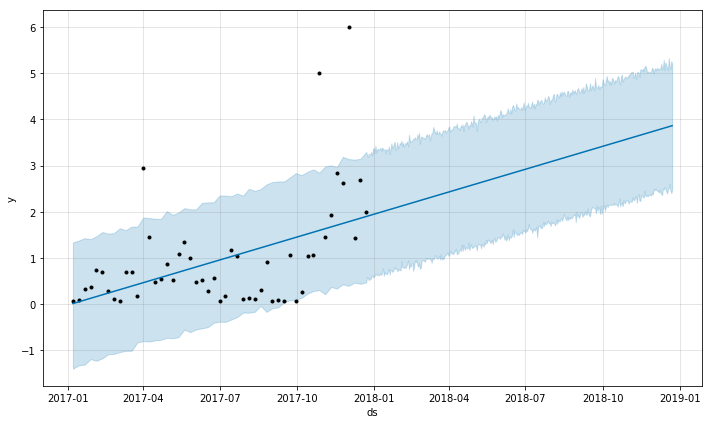

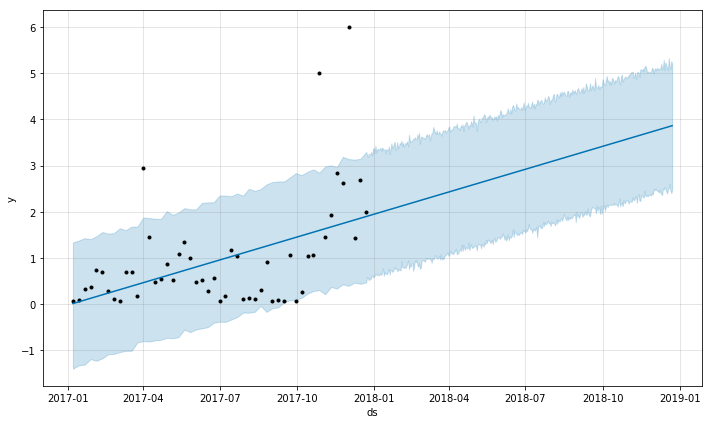

In [12]:
m.plot(forecast)

In [14]:
print forecast.columns

Index([u'ds', u'trend', u'trend_lower', u'trend_upper', u'yhat_lower',
       u'yhat_upper', u'seasonal', u'seasonal_lower', u'seasonal_upper',
       u'yhat'],
      dtype='object')


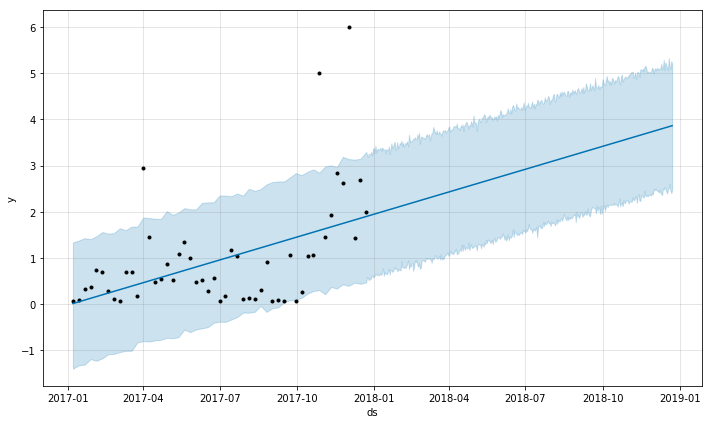

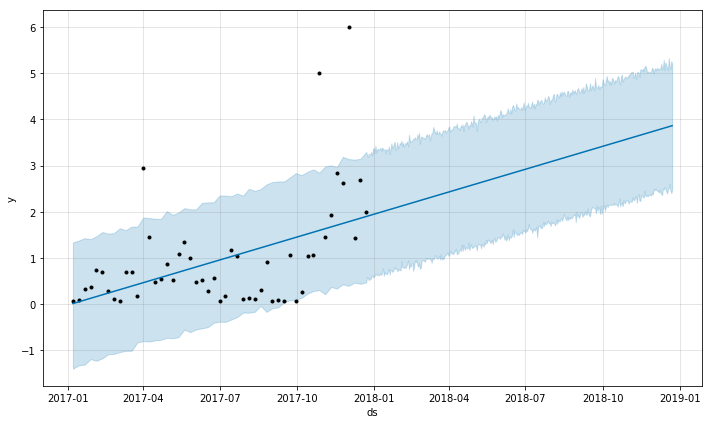

In [16]:
m.plot(forecast)

In [20]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,yhat
0,2017-01-07,0.015537,0.015537,0.015537,-1.394656,1.338794,0.0,0.0,0.0,0.015537
1,2017-01-14,0.053198,0.053198,0.053198,-1.319662,1.378140,0.0,0.0,0.0,0.053198
2,2017-01-21,0.090858,0.090858,0.090858,-1.306750,1.429770,0.0,0.0,0.0,0.090858
3,2017-01-28,0.128518,0.128518,0.128518,-1.187286,1.409084,0.0,0.0,0.0,0.128518
4,2017-02-04,0.166178,0.166178,0.166178,-1.223144,1.470807,0.0,0.0,0.0,0.166178


In [22]:
future.tail()

,ds
411,2018-12-19
412,2018-12-20
413,2018-12-21
414,2018-12-22
415,2018-12-23


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


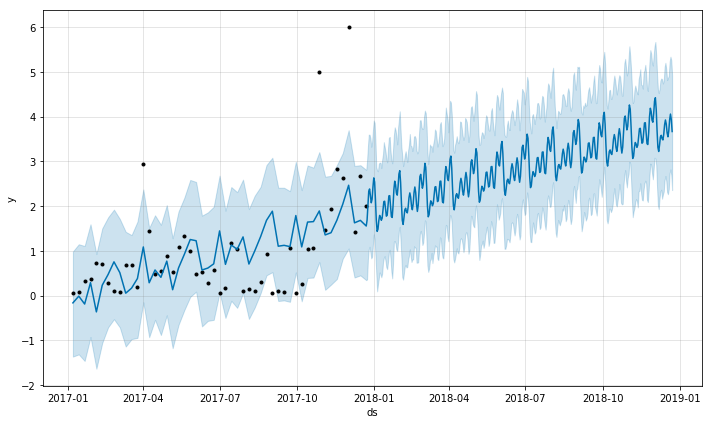

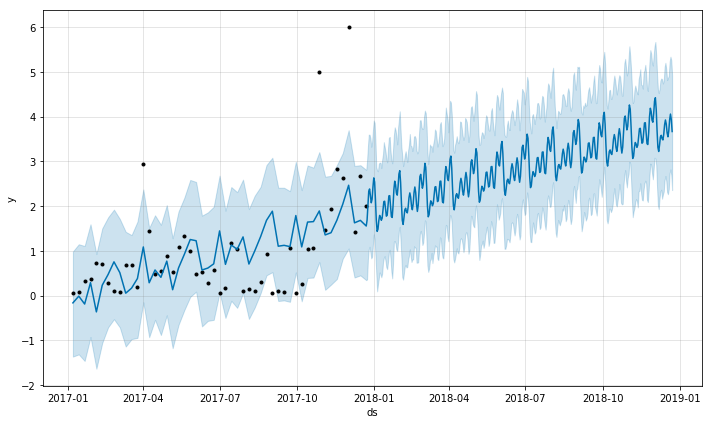

In [46]:
m3 = Prophet(weekly_seasonality=False)
m3.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast3 = m3.fit(tst).predict(future)
m3.plot(forecast3)

In [ ]:
I could hear you for a bit there yes i here


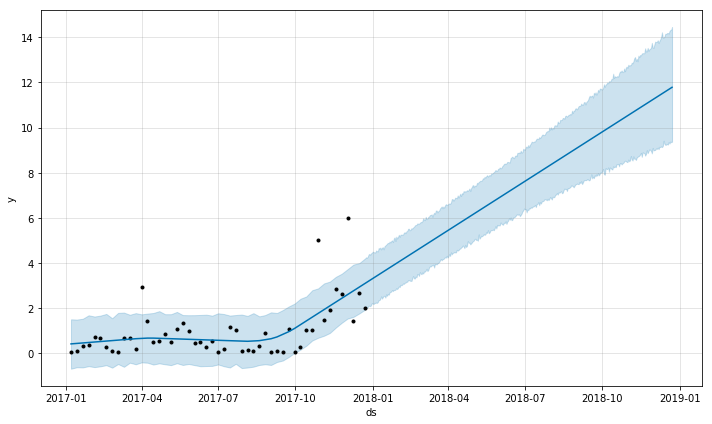

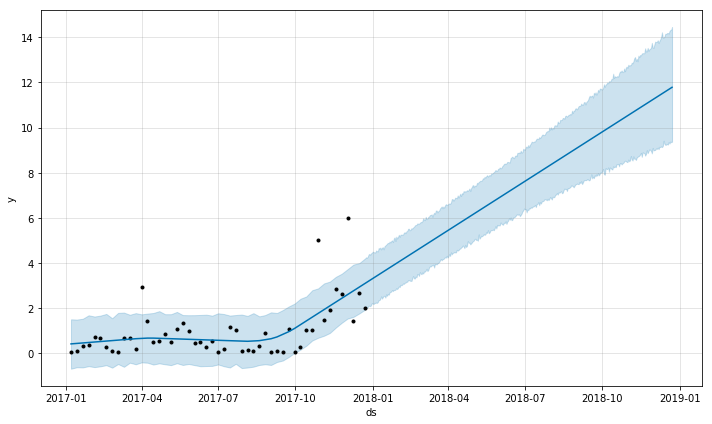

In [50]:
m2.plot(forecast2)

In [37]:
m2 = Prophet(changepoint_prior_scale = 0.5)
forecast2 = m2.fit(tst).predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


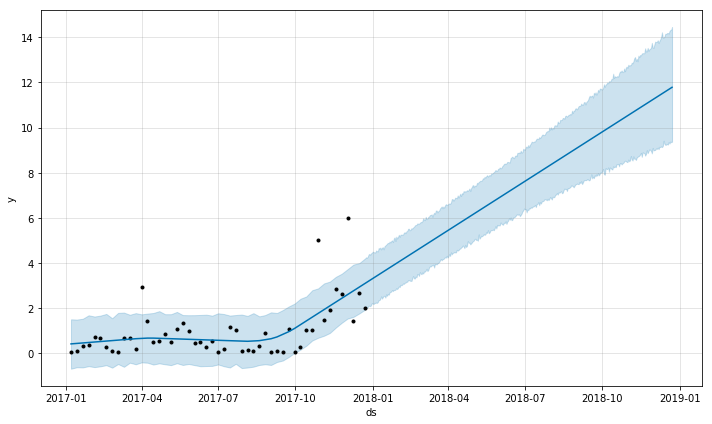

In [38]:
print(m2.plot(forecast2))

Figure(720x432)


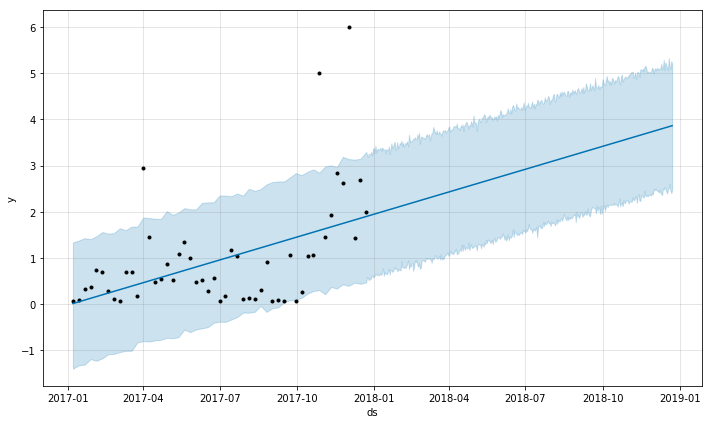

In [32]:
print(m.plot(forecast))

In [40]:
forecast2.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,yhat
0,2017-01-07,0.421007,0.421007,0.421007,-0.678196,1.509569,0.0,0.0,0.0,0.421007
1,2017-01-14,0.441852,0.441852,0.441852,-0.613915,1.499161,0.0,0.0,0.0,0.441852
2,2017-01-21,0.462696,0.462696,0.462696,-0.620794,1.533843,0.0,0.0,0.0,0.462696
3,2017-01-28,0.483540,0.483540,0.483540,-0.565836,1.688188,0.0,0.0,0.0,0.483540
4,2017-02-04,0.504384,0.504384,0.504384,-0.607411,1.632924,0.0,0.0,0.0,0.504384


In [ ]:
mdltst.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='CPU %', color ='red')

In [161]:
mdltst.set_index('Date', inplace=True)
mdltst['Month']= mdltst.index.month
mdltst['Day']=mdltst.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
mdltst.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBITST05,Wk 1,0.0710,26.5,1,7
2017-01-14,CALBITST05,Wk 2,0.0884,12.0,1,14
2017-01-21,CALBITST05,Wk 3,0.3320,12.0,1,21
2017-01-28,CALBITST05,Wk 4,0.3710,6.9,1,28
2017-02-04,CALBITST05,Wk 5,0.7400,8.3,2,4


In [163]:
test=mdltst[['CPU %']].dropna()

<B>CALBIPRDTST CPU% (Rolling One Month)</B>

In [164]:
test.head()

,CPU %
Date,
2017-01-07,0.0710
2017-01-14,0.0884
2017-01-21,0.3320
2017-01-28,0.3710
2017-02-04,0.7400


In [165]:
m=Prophet()
#m.fit(test);
future=m.make_future_dataframe(periods=365)

AttributeError: 'NoneType' object has no attribute 'max'

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


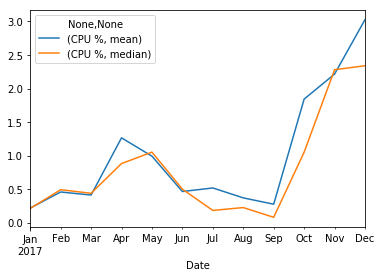

In [86]:
mdltst[['CPU %']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for CPU % - Week / Month Difference<b>

In [10]:
print 'CALBIPRDTST CPU % Week Corr', mdltst['CPU %'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRDTST CPU % Month Corr', mdltst['CPU %'].resample('M').mean().autocorr(lag=1)

CALBIPRDTST CPU % Week Corr 0.422003535462
CALBIPRDTST CPU % Month Corr 0.746621211628


<b>Autocorrlation for CPU % - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [11]:
print 'diff(1) lag =1 :', mdltst['CPU %'].dropna().diff(1).dropna().autocorr(lag=1)
print 'lag =1 :', mdltst['CPU %'].dropna().autocorr(lag=1)
print 'lag =2 :', mdltst['CPU %'].dropna().autocorr(lag=2)
print 'lag =3 :', mdltst['CPU %'].dropna().autocorr(lag=3)
print 'lag =4 :', mdltst['CPU %'].dropna().autocorr(lag=4)
print 'lag =5 :', mdltst['CPU %'].dropna().autocorr(lag=5)
print 'lag =6 :', mdltst['CPU %'].dropna().autocorr(lag=6)
print 'lag =7 :', mdltst['CPU %'].dropna().autocorr(lag=7)
print 'lag =12 :', mdltst['CPU %'].dropna().autocorr(lag=12)
print 'lag =24 :', mdltst['CPU %'].dropna().autocorr(lag=24)
print 'lag =24 :', mdltst['CPU %'].dropna().autocorr(lag=34)

diff(1) lag =1 : -0.536727214728
lag =1 : 0.422003535462
lag =2 : 0.45138952904
lag =3 : 0.374504316662
lag =4 : 0.316896073622
lag =5 : 0.558777090699
lag =6 : 0.114553455214
lag =7 : 0.191782356829
lag =12 : -0.306649613318
lag =24 : -0.0215280389233
lag =24 : 0.318518191732


 <b> CALBITST05 CPU % Autocorrlation - Month Lag 1 to 11</b>

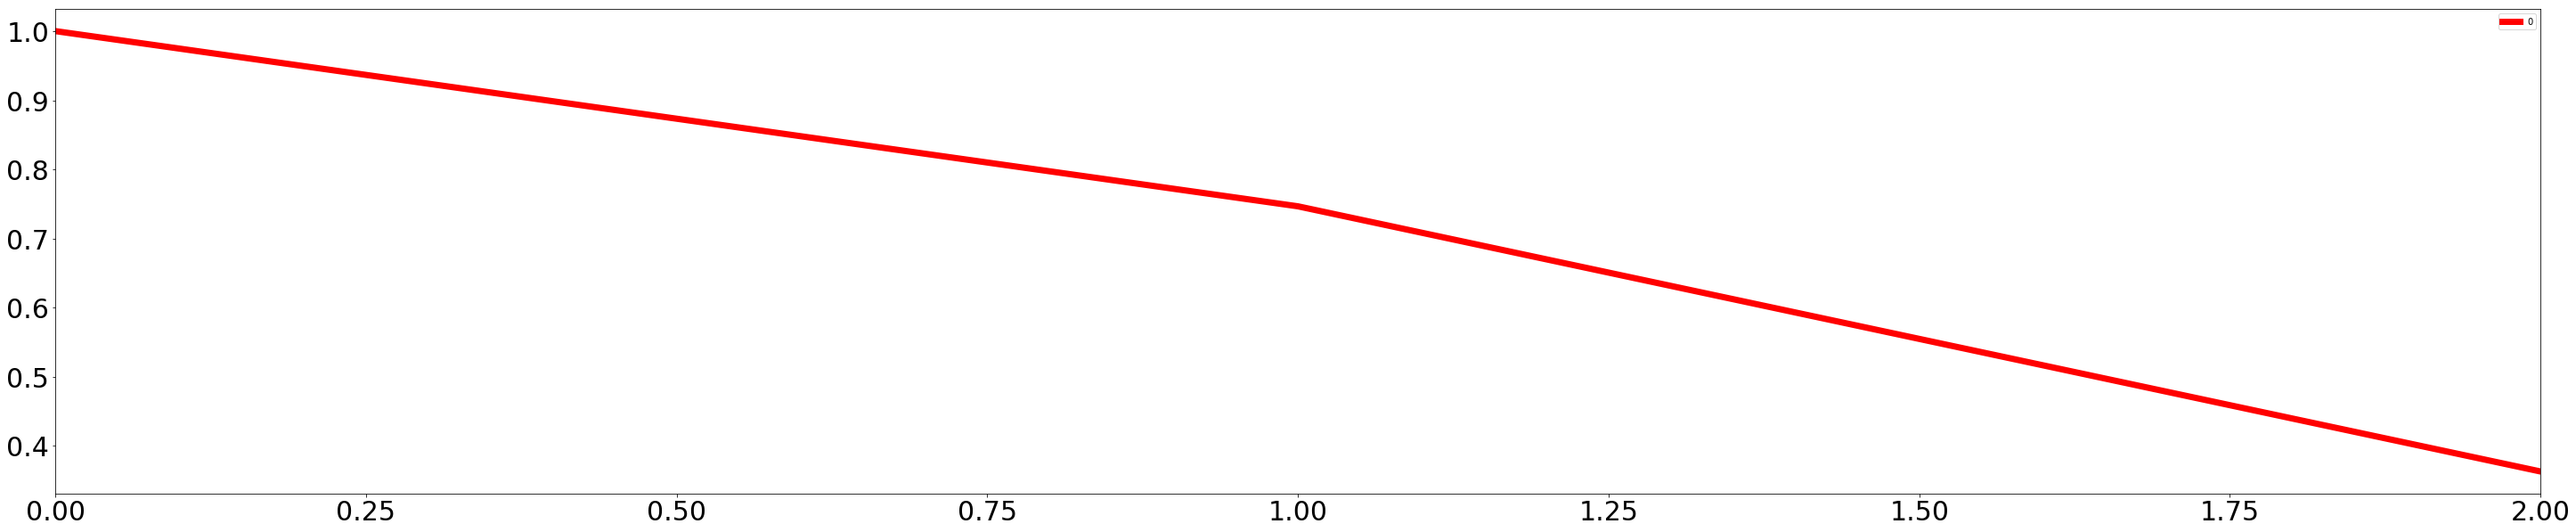

In [51]:
autoc = []

for i in range(3):
    autoc.append(mdltst['CPU %'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=7.0)

<b> CALBITST05 CPU % Autocorrlation - Week Lag 1 to 51</b>

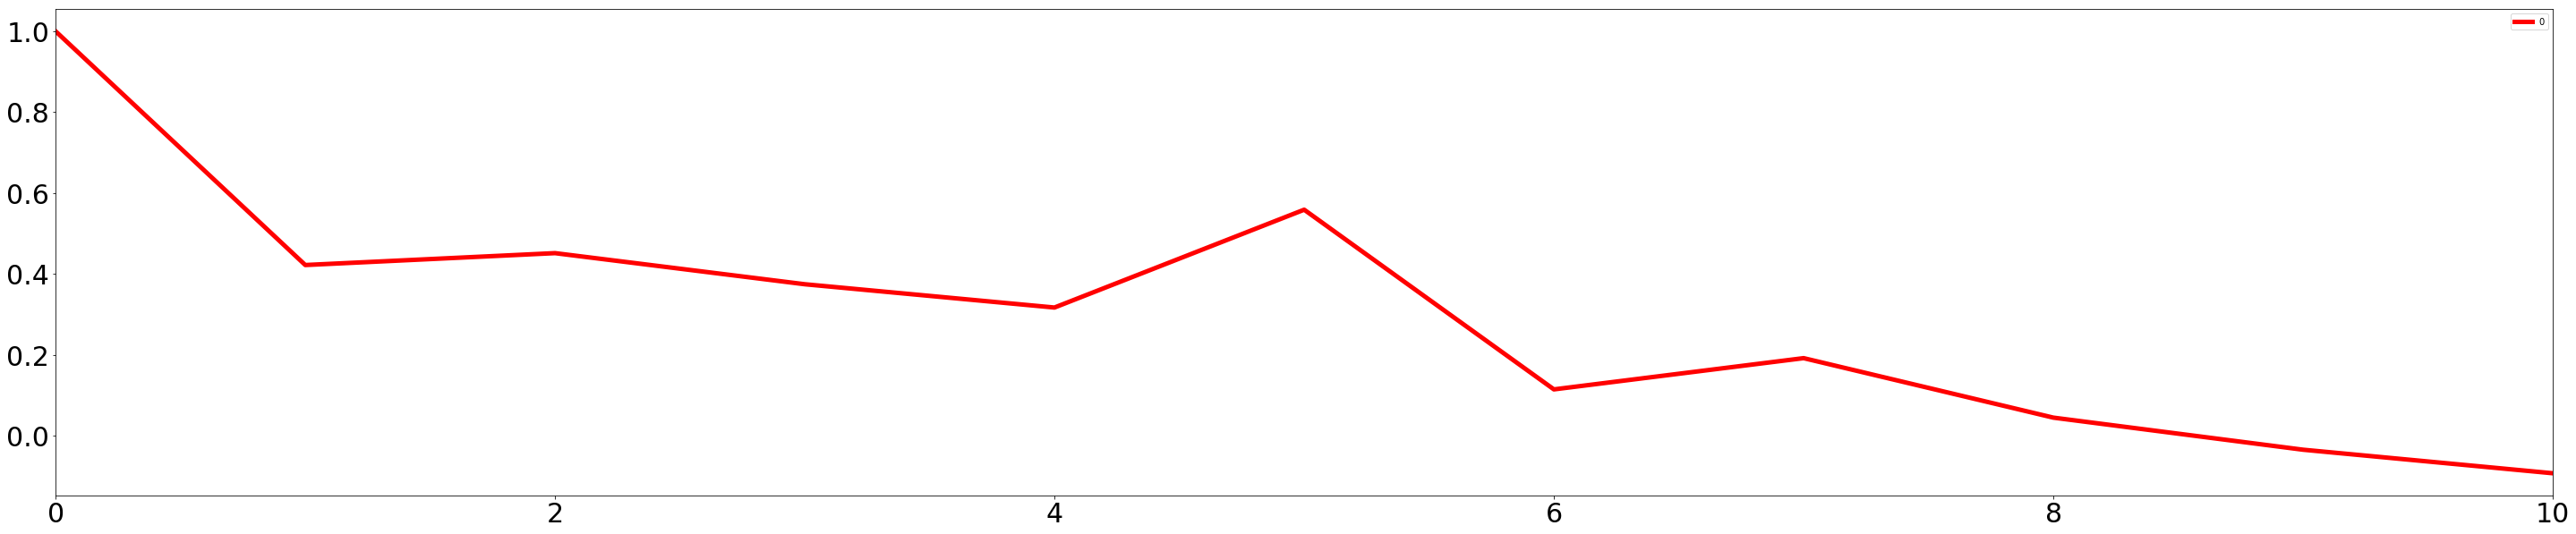

In [52]:
autoc = []

for i in range(11):
    autoc.append(mdltst['CPU %'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


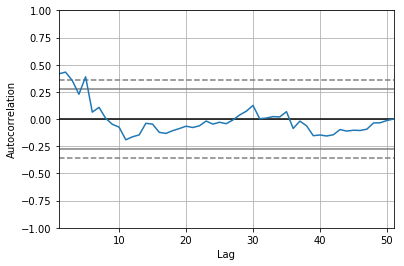

In [53]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdltst['CPU %'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

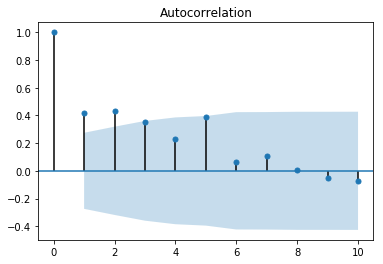

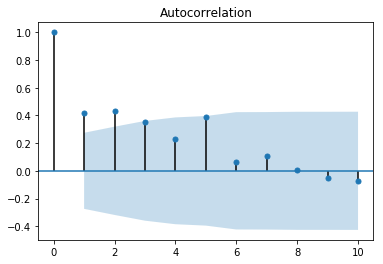

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdltst['CPU %'].dropna().diff(1).dropna(),lags=10) 
plot_acf(mdltst['CPU %'].dropna(),lags=10) 

<b> Trend and Seasonality falls within confident intervel, so no need of calculating 'diff' </b>
<br>Note:</br>
<br> <font color ='red'>Autocorrelation 0.422003535462 for lag 1 and falls not in intervel, NEED to use diff(1) </font> so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

In [55]:
from statsmodels.tsa.stattools import adfuller

adfuller(mdltst['CPU %'].dropna().diff(1).dropna())

(-3.3929993341365643,
 0.011199851519454797,
 4,
 45,
 {'1%': -3.5848288532235939,
  '10%': -2.6023438271604937,
  '5%': -2.9282991495198907},
 111.49303531743622)

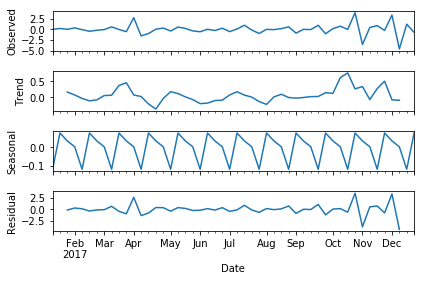

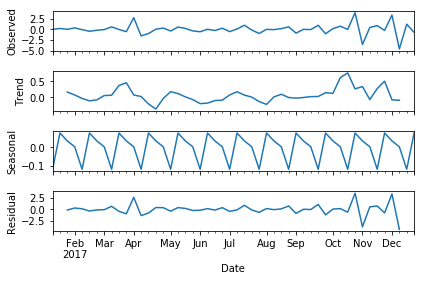

In [67]:
# extracting trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(mdltst['CPU %'].dropna().diff(1).dropna(), freq=4, model='additive')
decomp.plot()

In [61]:
adfuller(decomp.trend.dropna())

(-3.3728501869203593,
 0.011919968742727436,
 7,
 36,
 {'1%': -3.626651907578875,
  '10%': -2.6116707716049383,
  '5%': -2.9459512825788754},
 -24.950578064279526)

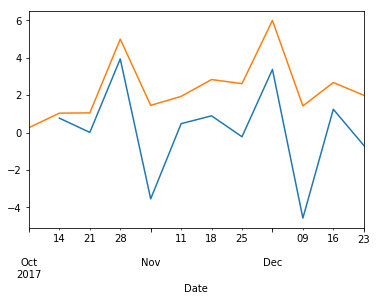

In [15]:
#mdl01['RAM'].dropna().plot()
mdltst['CPU %'].dropna().diff(1).dropna().plot()
mdltst['CPU %'].dropna().plot()

In [16]:
from statsmodels.tsa.arima_model import ARMA
#mdlsqla = mdltst[['CPU %']].dropna().diff(1).dropna().astype(float)
mdlsqla = mdltst[['CPU %']].dropna().astype(float)
modela = ARMA(mdlsqla, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -22.498
Method:                       css-mle   S.D. of innovations              1.576
Date:                Wed, 10 Jan 2018   AIC                             50.996
Time:                        18:28:59   BIC                             52.450
Sample:                    10-07-2017   HQIC                            50.457
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3871      0.406      5.874      0.000       1.591       3.184
ar.L1.CPU %    -0.1397      0.298     -0.469      0.649      -0.724       0.444
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.1592           +0.0000j            7.1592            0.5000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'CPU %' coef is 0.7486 which is high, so need to use 'diff' to make it stationary and <b>P value is > .0000</b> which is not significant.</br><b><font color ='red' ><br> 1. When diff =0 AR coef is .4188 and autocorrelation at lag 1 is 0.422003535462 and P 0.002 <.05 <font color ='blue'>which is significant </font></br> 
<br>2. When diff =1 AR coef is -0.5280 and autocorrelation at lag 1 with diff(1) is -0.536727214728 and P 0.000 <.05 </br> </font></b><b>5 th lag is out of range  <font color ='blue'> -5280 with in overly diferenciated even though P is 0.0005 <.05 which is significant, due to this no need to use diff() in the model </font></b>

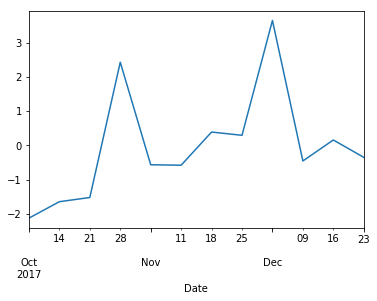

In [17]:
modela.resid.plot()

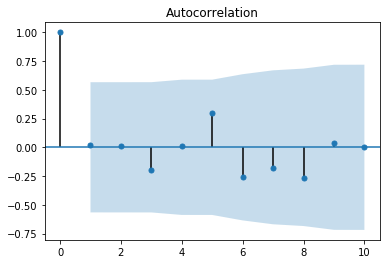

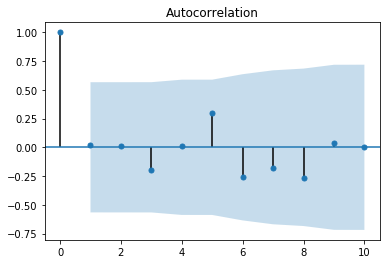

In [18]:
plot_acf(modela.resid, lags=10)

In [19]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

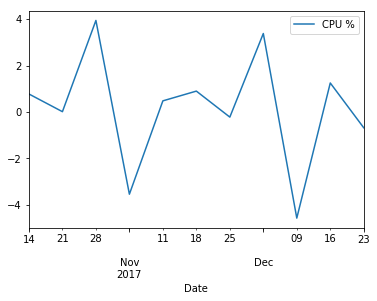

In [69]:
mdltstm.plot()

In [70]:
# mdltstm = mdltst[['CPU %']].dropna().diff(1).dropna().astype(float)
mdltstm = mdltst[['CPU %']].dropna().astype(float)
modelm = ARMA(mdltstm, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                 -78.295
Method:                       css-mle   S.D. of innovations              1.122
Date:                Wed, 10 Jan 2018   AIC                            162.589
Time:                        18:59:10   BIC                            168.385
Sample:                    01-07-2017   HQIC                           164.804
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9834      0.200      4.920      0.000       0.592       1.375
ma.L1.CPU %     0.2772      0.114      2.430      0.019       0.054       0.501
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6081           +0.0000j            3.6081            0.5000
-----------------------------------------------------------------------------
"""

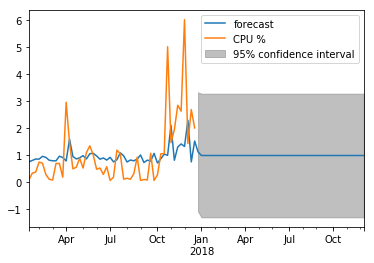

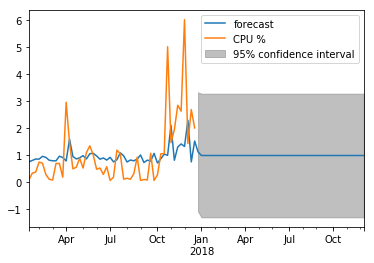

In [75]:
modelm.plot_predict(1,100)

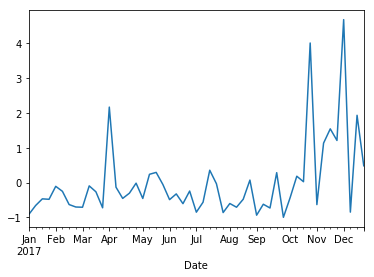

In [71]:
modelm.resid.plot()

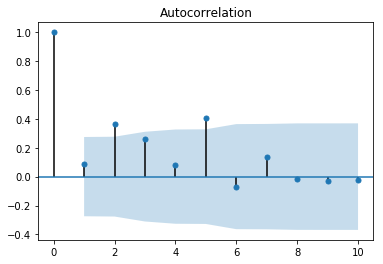

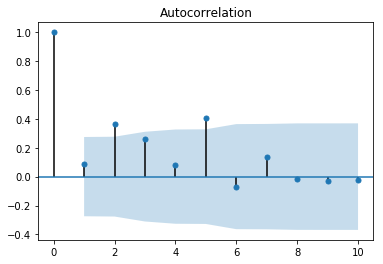

In [72]:
plot_acf(modelm.resid, lags=10)

<b>ARIMA</b>

In [76]:
from statsmodels.tsa.arima_model import ARIMA
mdltst = mdltst[['CPU %']].dropna().astype(float)
model = ARIMA(mdltst, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.CPU %   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -75.107
Method:                       css-mle   S.D. of innovations              1.083
Date:                Wed, 10 Jan 2018   AIC                            156.213
Time:                        19:04:14   BIC                            161.949
Sample:                    01-14-2017   HQIC                           158.398
                         - 12-23-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0438      0.101      0.433      0.667      -0.154       0.242
ar.L1.D.CPU %    -0.5280      0.118     -4.486      0.000      -0.759      -0.297
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8941           +0.0000j            1.8941            0.5000
-----------------------------------------------------------------------------
"""

In [77]:
#mdl05['CPU %'].dropna().diff(1).dropna().autocorr(1)
mdltst['CPU %'].dropna().autocorr(1)

0.42200353546155711

<b>Note:</b><font color ='red'><br>From ARIMA (1,1,0) coef is -0.5280 and P value is < .05 which is significant </br></font>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


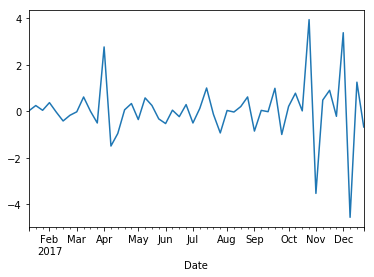

In [78]:
#model.resid.plot()
mdltst['CPU %'].dropna().diff(1).dropna().plot()

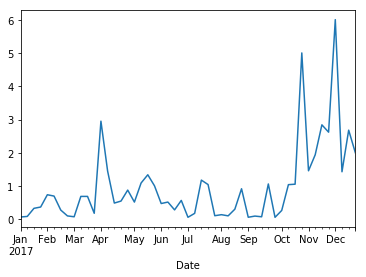

In [79]:
mdltst['CPU %'].dropna().plot()

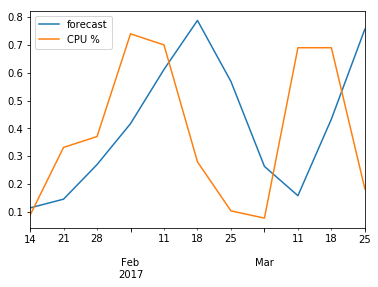

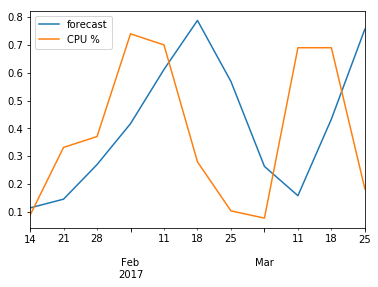

In [80]:
model.plot_predict(1, 11)

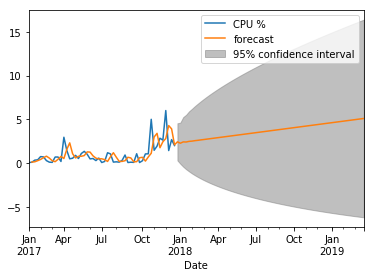

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdltst['CPU %'].dropna().plot(ax=ax)
fig = model.plot_predict(1,115, ax=ax, plot_insample=False)

In [82]:
model.predict(1,10)

2017-01-14    0.043764
2017-01-21    0.057683
2017-01-28   -0.061742
2017-02-04    0.046279
2017-02-11   -0.127948
2017-02-18    0.087988
2017-02-25    0.288614
2017-03-04    0.159791
2017-03-11    0.080597
2017-03-18   -0.256243
Freq: W-SAT, dtype: float64

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [93]:
mdlstst = mdltst[['CPU %']].dropna().astype(float)
model = SARIMAX(mdlstst, order=(1, 1, 0), seasonal_order=(1,0,0,4), enforce_stationarity=True).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             CPU %   No. Observations:                   51
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 4)   Log Likelihood                 -75.116
Date:                           Wed, 10 Jan 2018   AIC                            156.232
Time:                                   21:01:53   BIC                            162.027
Sample:                               01-07-2017   HQIC                           158.446
                                    - 12-23-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5107      0.126     -4.061      0.000      -0.757      -0.264
ar.S.L4       -0.0708      0.227     -0.311      0.756      -0.517       0.375
sigma2         1.1741      0.173      6.771      0.000       0.834       1.514
===================================================================================
Ljung-Box (Q):                       40.75   Jarque-Bera (JB):                35.44
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               3.95   Skew:                             0.96
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

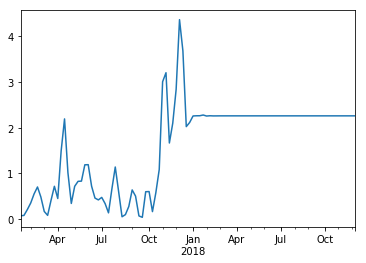

In [94]:
model.predict(1,100).plot()

<b>Ask 1 .why whehn difff(1) gives more inclient graph but not for AR(1) or ARIMA(1,0,0)
<br>2. When to use ARIMA(1,1,1) or ARIMA(0,1,1)</br>
<br>in graph whats the differece between 126 and 127</br></b>